# Midterm Activity: Report on Data Exploration Techniques

**Objective:**
In this activity, you will explore a dataset of your choice using basic descriptive statistics techniques with your group. The goal is to understand the characteristics of the dataset, such as central tendency and variability, using Python libraries like scipy or similar.

1. Selecting a Dataset:
- Find a dataset that interests your group. You can use publicly available datasets from platforms like Kaggle, UCI Machine Learning Repository, or any other open data source.
- Ensure the dataset has multiple numerical variables so you can effectively apply descriptive statistics.
If you have any questions, consult with me regarding your dataset.

2. Setting Up the Environment:
- Use a Jupyter notebook to conduct your analysis.
- Ensure that your Python environment has the necessary libraries installed, including:
    - pandas (for data manipulation)
    - numpy (for numerical operations)
    - scipy.stats (for statistical functions)
    - matplotlib or seaborn (for visualizing data)

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

3. Data Exploration:
- Load the dataset into your Jupyter notebook using pandas.
- Clean the data by handling missing values or outliers as needed. You may choose to remove, fill, or impute missing data.
- Check for data types and structure using commands like df.info() and df.describe().

In [109]:
df = pd.read_csv('PowerGeneration.csv')
print(df.head(10))
for column in df.columns[1:]:  
    df[column] = df[column].replace(',', '', regex=True).astype(float)

missing_values = df.isnull().sum()
print(missing_values)

df.fillna(0, inplace=True)  

print(df.info())

summary = df.describe()
print(summary)

   Years Biomass    Coal Geothermal  Hydro Natural Gas Oil-based Solar Wind  \
0   1990       0   1,934      5,466  6,062           0    12,434     0    0   
1   1991       0   1,942      5,758  5,145           0    12,804     0    0   
2   1992       0   1,791      5,700  4,440           0    13,939     0    0   
3   1993       0   2,015      5,667  5,030           0    13,867     0    0   
4   1994       0   1,348      6,320  5,862           0    16,929     0    0   
5   1995       0   2,109      6,135  6,232           0    19,078     0    0   
6   1996       0   4,855      6,534  7,030           0    18,288     0    0   
7   1997       0   7,363      7,237  6,069          12    19,116     0    0   
8   1998       0   9,388      8,914  5,084          20    18,174     0    0   
9   1999       0  11,183     10,594  7,840          16    11,799     0    0   

  Grand Total  
0      25,896  
1      25,649  
2      25,870  
3      26,579  
4      30,459  
5      33,554  
6      36,708  
7 

4. Basic Descriptive Statistics:

- Calculate the following for your numerical variables:
    - Mean and median (central tendency)
    - Mode (most frequent value)
    - Standard deviation and variance (spread of the data)
    - Min, max, and range
    - Percentiles (e.g., 25th, 50th, 75th percentiles)
- Use scipy.stats.describe() or relevant pandas methods (mean(), median(), std(), etc.) to compute these statistics.

In [110]:
# # Remove the 'Years' column for analysis
# df = df.drop(columns=['Years'])

mean_values = df.mean()
median_values = df.median()
mode_values = df.mode().iloc[0]

std_dev = df.std()
variance = df.var()

min_values = df.min()
max_values = df.max()
range_values = max_values - min_values

percentiles = df.quantile([0.25, 0.5, 0.75])

print("Mean:\n\n", mean_values)
print("\nMedian:\n\n", median_values)
print("\nMode:\n\n", mode_values)
print("\nStandard Deviation:\n\n", std_dev)
print("\nVariance:\n\n", variance)
print("\nMin Values:\n\n", min_values)
print("\nMax Values:\n\n", max_values)
print("\nRange:\n\n", range_values)
print("\nPercentiles:\n\n", percentiles)

Mean:

 Years           2005.000000
Biomass          201.903226
Coal           20746.161290
Geothermal      9247.387097
Hydro           7793.870968
Natural Gas    11173.612903
Oil-based       8816.967742
Solar            204.258065
Wind             217.225806
Grand Total    58401.548387
dtype: float64

Median:

 Years           2005.0
Biomass            0.0
Coal           16194.0
Geothermal     10242.0
Hydro           7870.0
Natural Gas    16366.0
Oil-based       6293.0
Solar              1.0
Wind              17.0
Grand Total    56568.0
dtype: float64

Mode:

 Years           1990.0
Biomass            0.0
Coal            1348.0
Geothermal      5466.0
Hydro           4440.0
Natural Gas        0.0
Oil-based       2474.0
Solar              0.0
Wind               0.0
Grand Total    25649.0
Name: 0, dtype: float64

Standard Deviation:

 Years              9.092121
Biomass          385.052668
Coal           16901.184598
Geothermal      1963.802734
Hydro           1682.535344
Natural Gas    

5. Visual Representation:
- Plot histograms and box plots to visualize the distribution of the data.
- Generate correlation matrices or heatmaps to observe relationships between variables (optional but encouraged).

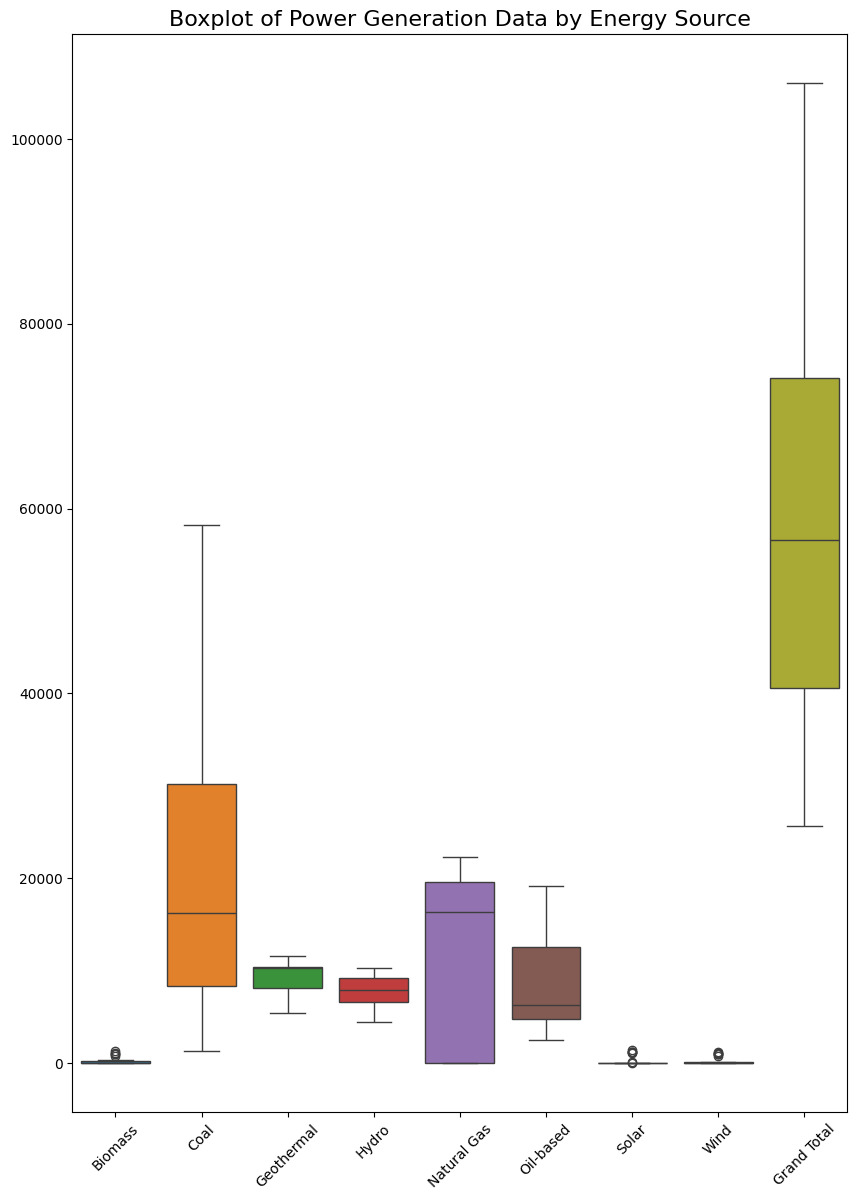

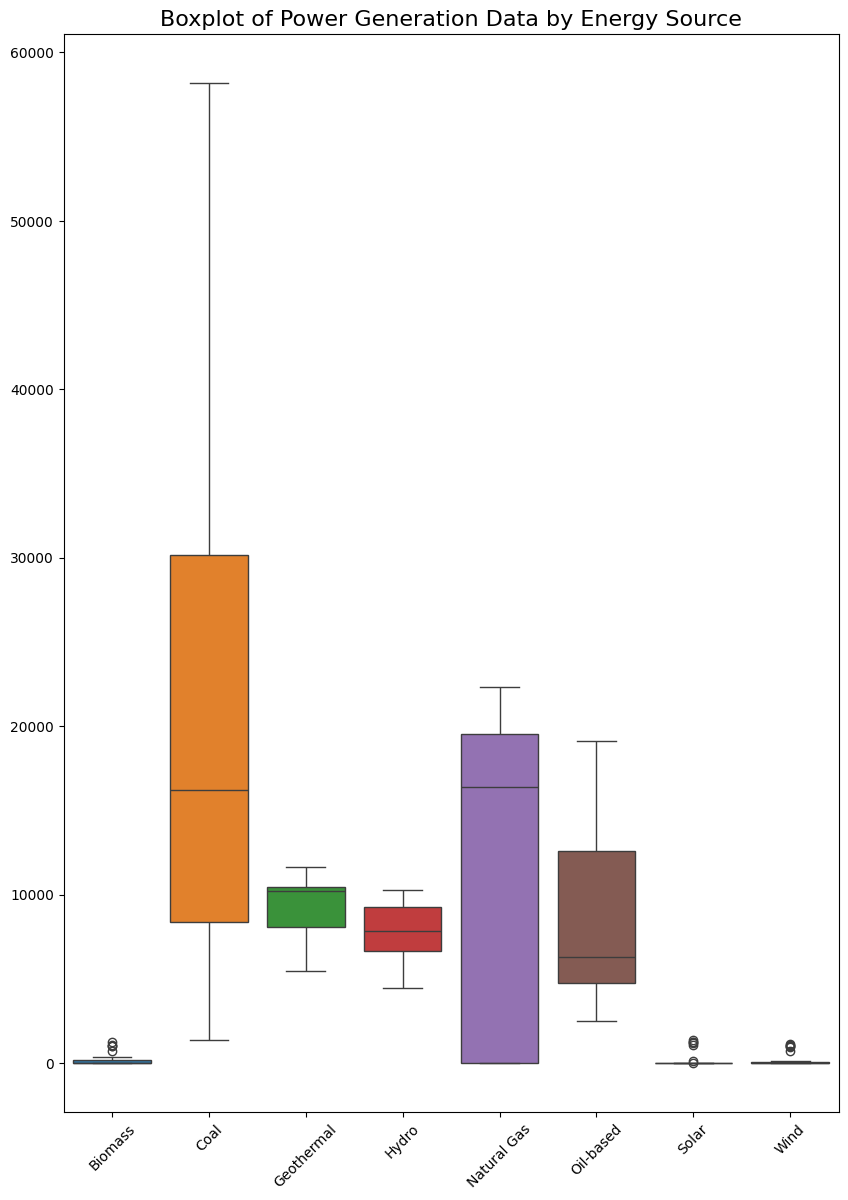

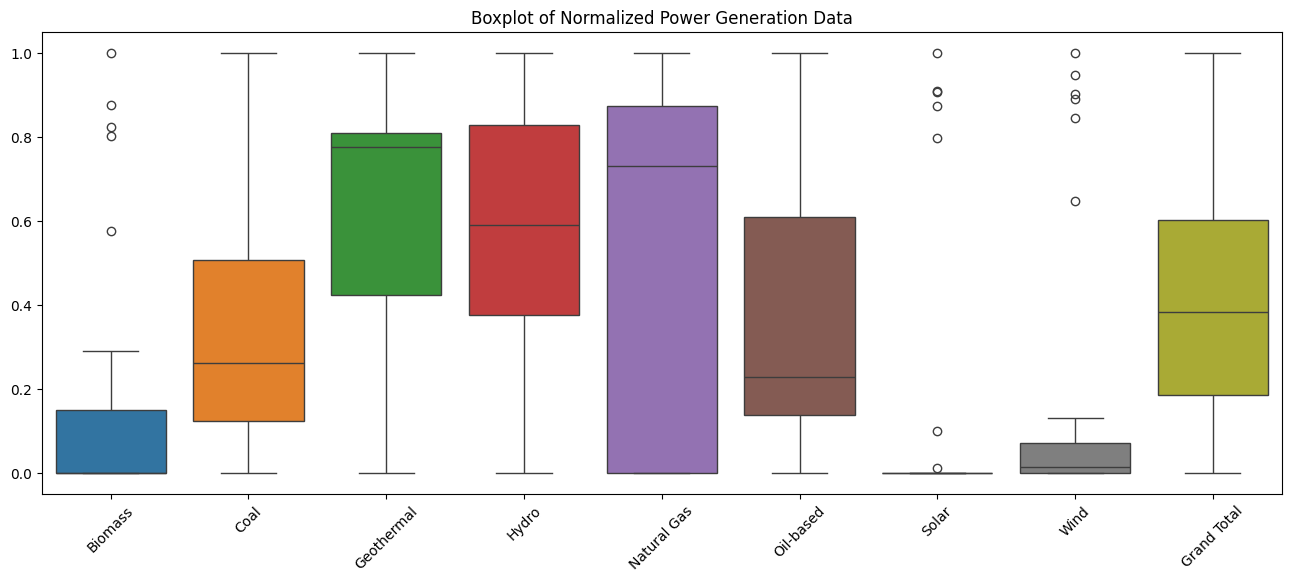

In [111]:
#VISUAL REPRESENTATIONS

# # Histograms for numerical variables
# df.drop('Years', axis=1).hist(bins=15, figsize=(15, 10), layout=(3, 3))
# plt.suptitle('Histograms of Power Generation Variables')
# plt.show()

# Boxplot to visualize outliers
plt.figure(figsize=(10, 14))
sns.boxplot(data=df.drop('Years', axis=1))
plt.xticks(rotation=45)
plt.title('Boxplot of Power Generation Data by Energy Source', fontsize=16)
plt.show()

# Boxplot to visualize outliers excluding Grand Total
plt.figure(figsize=(10, 14))
sns.boxplot(data=df.drop(columns=['Years', 'Grand Total']))
plt.xticks(rotation=45)
plt.title('Boxplot of Power Generation Data by Energy Source', fontsize=16)
plt.show()

df_normalized = df.drop('Years', axis=1).apply(lambda x: (x - x.min()) / (x.max() - x.min()))
# Plot the normalized data
plt.figure(figsize=(16, 6))
sns.boxplot(data=df_normalized)
plt.xticks(rotation=45)
plt.title('Boxplot of Normalized Power Generation Data')
plt.show()

In [112]:
# # Set up the plot
# plt.figure(figsize=(10, 6))

# # Create the density plot with rug for the 'Coal' column as an example
# sns.kdeplot(data=df, x='Coal', fill=True, color='skyblue', alpha=0.5, bw_adjust=0.5, label='Density')
# sns.rugplot(data=df, x='Coal', color='orange', alpha=0.7)

# # Add labels and title
# plt.title('Density Plot of Coal Power Generation with Rug Plot')
# plt.xlabel('Coal Power Generation')
# plt.ylabel('Density')
# plt.legend()

# # Show the plot
# plt.show()

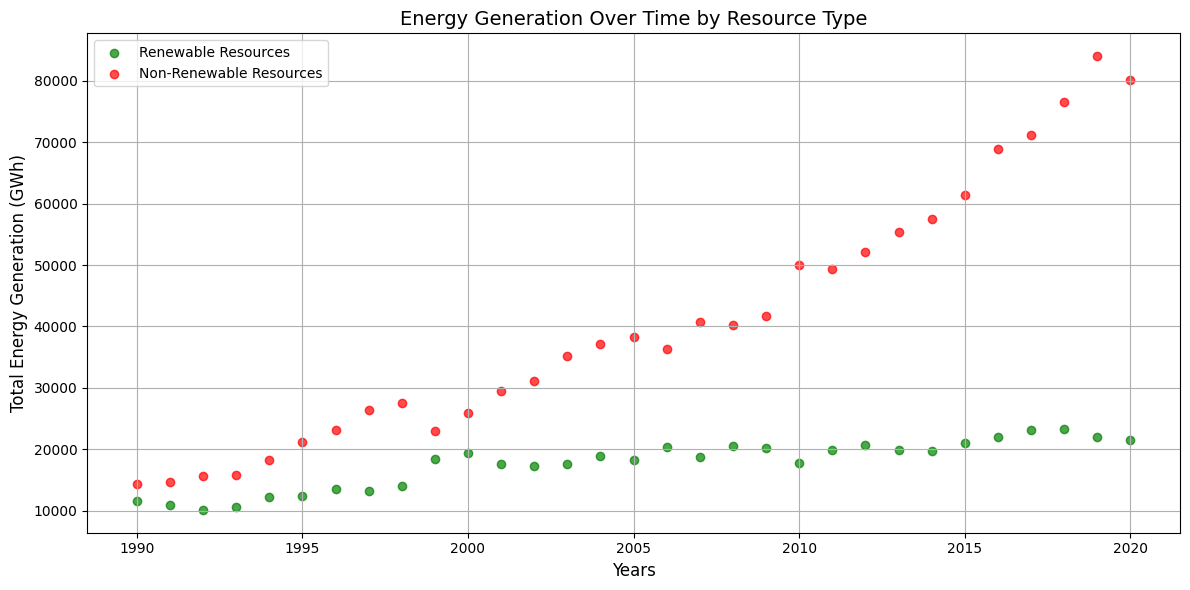

In [113]:
# df = pd.read_csv('PowerGeneration.csv')

# for column in df.columns[1:]:
#     df[column] = df[column].replace(',', '', regex=True).astype(float)

renewable_columns = ['Biomass', 'Geothermal', 'Hydro', 'Solar', 'Wind']
non_renewable_columns = ['Coal', 'Natural Gas', 'Oil-based']

df['Renewable Total'] = df[renewable_columns].sum(axis=1)
df['Non-Renewable Total'] = df[non_renewable_columns].sum(axis=1)

plt.figure(figsize=(12, 6))

plt.scatter(df['Years'], df['Renewable Total'], color='green', label='Renewable Resources', marker='o', alpha=0.7)

plt.scatter(df['Years'], df['Non-Renewable Total'], color='red', label='Non-Renewable Resources', marker='o', alpha=0.7)

plt.title('Energy Generation Over Time by Resource Type', fontsize=14)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Total Energy Generation (GWh)', fontsize=12)
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()


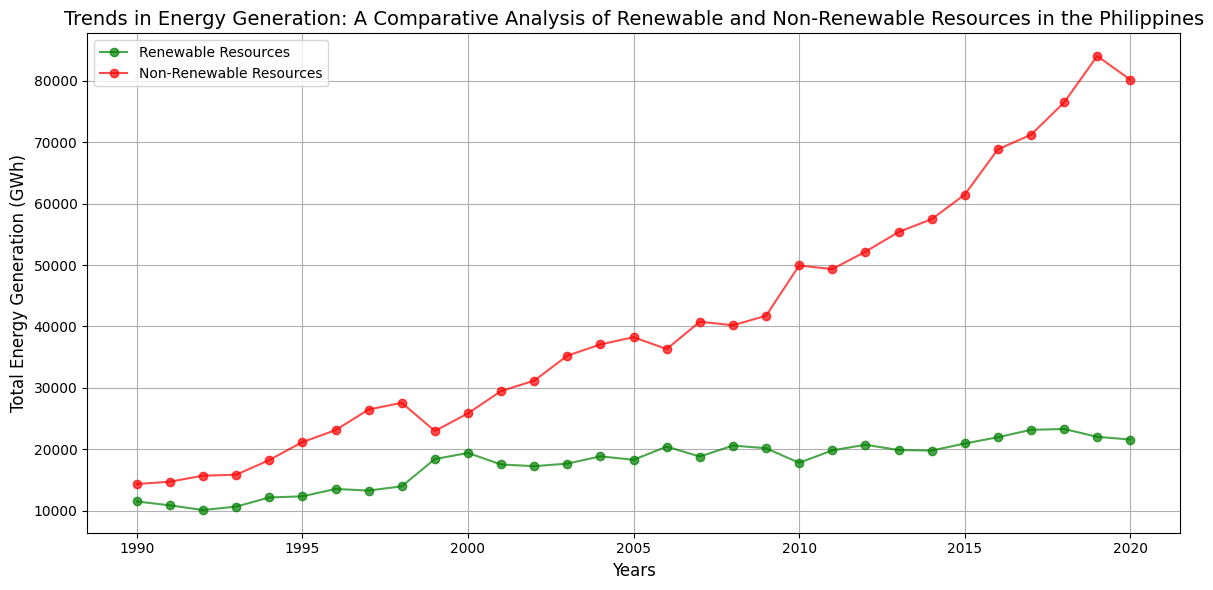

In [114]:
# import pandas as pd
# import matplotlib.pyplot as plt

# df = pd.read_csv('PowerGeneration.csv')

# for column in df.columns[1:]:
#     df[column] = df[column].replace(',', '', regex=True).astype(float)

# renewable_columns = ['Biomass', 'Geothermal', 'Hydro', 'Solar', 'Wind']
# non_renewable_columns = ['Coal', 'Natural Gas', 'Oil-based']

# df['Renewable Total'] = df[renewable_columns].sum(axis=1)
# df['Non-Renewable Total'] = df[non_renewable_columns].sum(axis=1)

plt.figure(figsize=(12, 6))

plt.plot(df['Years'], df['Renewable Total'], color='green', label='Renewable Resources', marker='o', linestyle='-', alpha=0.7)

plt.plot(df['Years'], df['Non-Renewable Total'], color='red', label='Non-Renewable Resources', marker='o', linestyle='-', alpha=0.7)

plt.title('Trends in Energy Generation: A Comparative Analysis of Renewable and Non-Renewable Resources in the Philippines', fontsize=14)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Total Energy Generation (GWh)', fontsize=12)

plt.legend()

plt.grid(True)
plt.tight_layout()

# plt.savefig('energy_generation_trends.png')

plt.show()


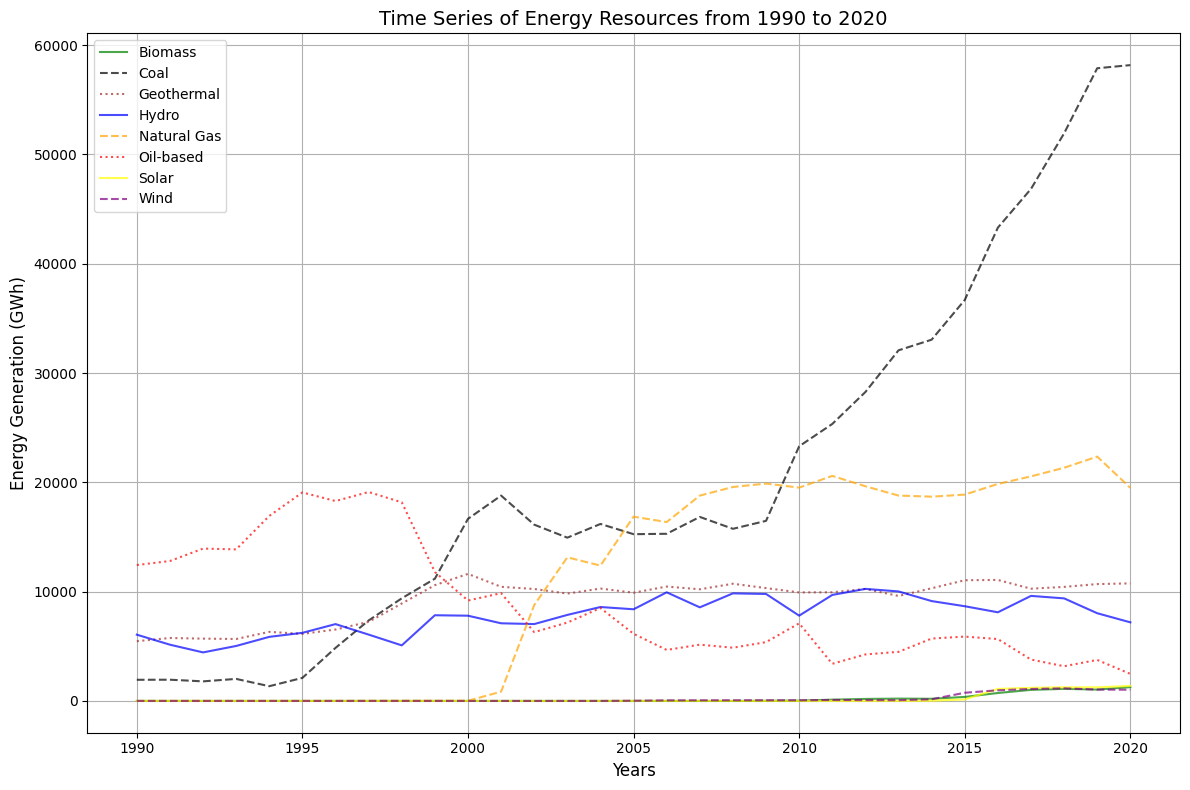

In [115]:
# import pandas as pd
# import matplotlib.pyplot as plt

# df = pd.read_csv('PowerGeneration.csv')

# for column in df.columns[1:]:
#     df[column] = df[column].replace(',', '', regex=True).astype(float)

plt.figure(figsize=(12, 8))

plt.plot(df['Years'], df['Biomass'], label='Biomass', color='green', linestyle='-', alpha=0.7)
plt.plot(df['Years'], df['Coal'], label='Coal', color='black', linestyle='--', alpha=0.7)
plt.plot(df['Years'], df['Geothermal'], label='Geothermal', color='brown', linestyle=':', alpha=0.7)
plt.plot(df['Years'], df['Hydro'], label='Hydro', color='blue', linestyle='-', alpha=0.7)
plt.plot(df['Years'], df['Natural Gas'], label='Natural Gas', color='orange', linestyle='--', alpha=0.7)
plt.plot(df['Years'], df['Oil-based'], label='Oil-based', color='red', linestyle=':', alpha=0.7)
plt.plot(df['Years'], df['Solar'], label='Solar', color='yellow', linestyle='-', alpha=0.7)
plt.plot(df['Years'], df['Wind'], label='Wind', color='purple', linestyle='--', alpha=0.7)

plt.title('Time Series of Energy Resources from 1990 to 2020', fontsize=14)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Energy Generation (GWh)', fontsize=12)

plt.legend(loc='upper left')

plt.grid(True)

plt.tight_layout()

plt.show()


In [116]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Load the dataset
# df = pd.read_csv('PowerGeneration.csv')

# # Clean the data by removing commas and converting to numeric
# for column in df.columns[1:]:  # Assuming the first column is 'Years'
#     df[column] = df[column].replace(',', '', regex=True).astype(float)

# # Select relevant fuel columns for pairwise comparison
# fuel_columns = ['Biomass', 'Coal', 'Geothermal', 'Hydro', 'Natural Gas', 'Oil-based', 'Solar', 'Wind']

# # Calculate skewness for each fuel column
# skewness = df[fuel_columns].skew()
# print("Skewness of fuel columns:")
# print(skewness)

# # Create a new DataFrame for Resource Type classification
# resource_types = []
# for column in fuel_columns:
#     if column in ['Biomass', 'Geothermal', 'Hydro', 'Solar', 'Wind']:
#         resource_types.append('Renewable')
#     else:
#         resource_types.append('Non-Renewable')

# # Create a new DataFrame with the resource types repeated for each row
# resource_type_df = pd.DataFrame({'Resource Type': resource_types})

# # Melt the DataFrame to use hue for Resource Type
# melted_df = df[fuel_columns].copy()
# melted_df['Resource Type'] = resource_type_df['Resource Type']

# # Create a pairplot for the selected fuel columns with hue
# sns.pairplot(melted_df, hue='Resource Type', palette='Set2')

# # Add a title
# plt.suptitle('Pairwise Comparison of Energy Resources', y=1.02)  # Adjust y to position the title

# # Show the plot
# plt.show()


6. Report Findings:
- You will need to present what you found in your data exploration to the class.
- Summarize your results in a Powerpoint Presentation report, including:
    - A brief introduction to your dataset (source, type of data, etc.)
    - Key statistics for the dataset.
    - Insights gained from the descriptive statistics (e.g., skewness, any noticeable outliers, spread, etc.).
    - Visualizations with interpretations.
    - Conclusion summarizing the dataset’s characteristics and any potential next steps for further analysis, including what problems you want to solve.

Link to Documentation as of September 30, 2024
https://docs.google.com/document/d/1dH_XwekNZMEbvz7tZhVSkjVfcEsXyAim0BCmR2B6l5k/edit?usp=sharing

Link to Powerpoint Presentation:
Canvas: https://www.canva.com/design/DAGSOXGT18s/kmkia7j1dIdIrrkQtwG4XA/edit